In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("College.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df = df.drop(['Unnamed: 0'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [7]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [0]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [9]:
df['Private'] = df['Private'].apply(converter)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Private        777 non-null int64
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


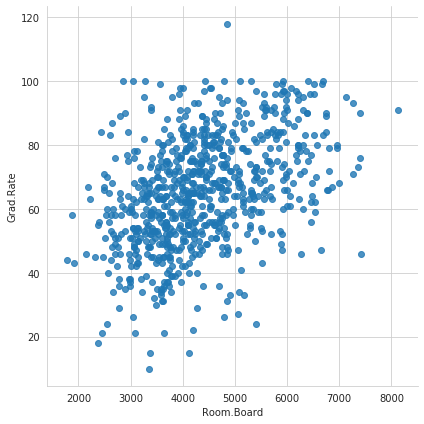

In [10]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df,
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

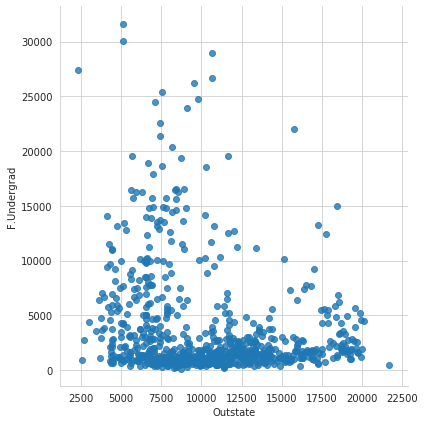

In [11]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df,
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [12]:
from sklearn.cluster import KMeans
X = df.drop(['Private'],axis=1)
y = df["Private"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

kmeans = KMeans(n_clusters=2, random_state = 10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

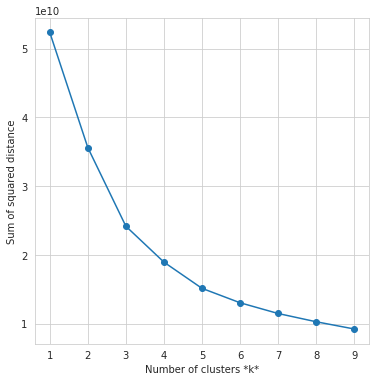

In [13]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [14]:
predicted = kmeans.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.21      0.59      0.31        58
           1       0.23      0.05      0.08       137

    accuracy                           0.21       195
   macro avg       0.22      0.32      0.19       195
weighted avg       0.22      0.21      0.15       195



In [15]:
accuracy_score(y_test, predicted)

0.21025641025641026

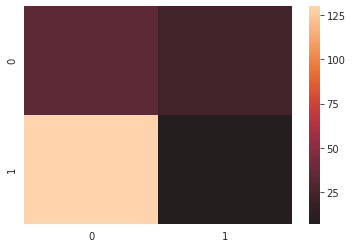

In [16]:
cm = confusion_matrix(y_test,predicted)
sns.heatmap(cm, center=True)
plt.show()

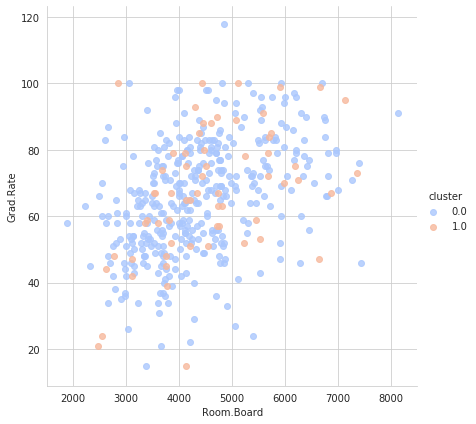

In [17]:
#Plotando os valores do cluster do "fit"
df_clusters_train = pd.DataFrame()
df_clusters_train.loc[:,"cluster"] = pd.Series(kmeans.labels_)
df_clusters_train = pd.concat([df_clusters_train,X_train],axis=1)

sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df_clusters_train,hue="cluster",
           palette='coolwarm',height=6,aspect=1,fit_reg=False)


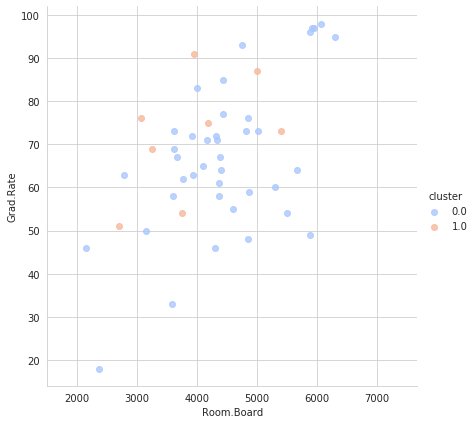

In [18]:
#Plotando os valores do cluster da predição
df_clusters_test = pd.DataFrame()
df_clusters_test.loc[:,"cluster"] = pd.Series(predicted)
df_clusters_test = pd.concat([df_clusters_test,X_test],axis=1)

sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df_clusters_test,hue="cluster",
           palette='coolwarm',height=6,aspect=1,fit_reg=False)


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X)

X = pd.DataFrame(data=principalComponents)
X = X.values

In [0]:
kmeans_colors = kmeans.fit_predict(X)
C = kmeans.cluster_centers_

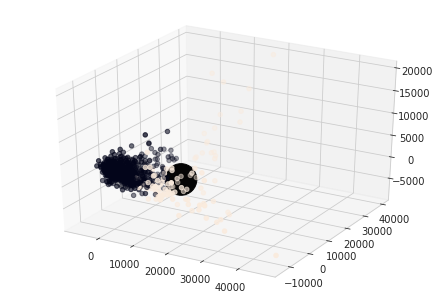

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_colors)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c='#050505', s=1000)